#### END OF DISTRIBUTION IMPUTATION

In [15]:
import pandas as pd
df = pd.read_csv('train.csv',usecols =['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

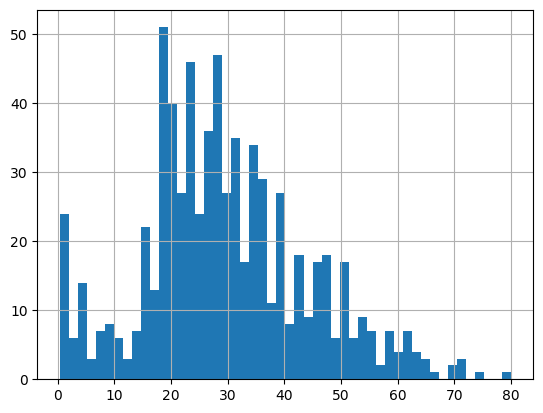

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
df.Age.hist(bins=50)

In [28]:
#WE take the data at the end of the distribution and replace it
#taking after 3rd standard deviation
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

In [16]:
%pip install seaborn

<AxesSubplot:>

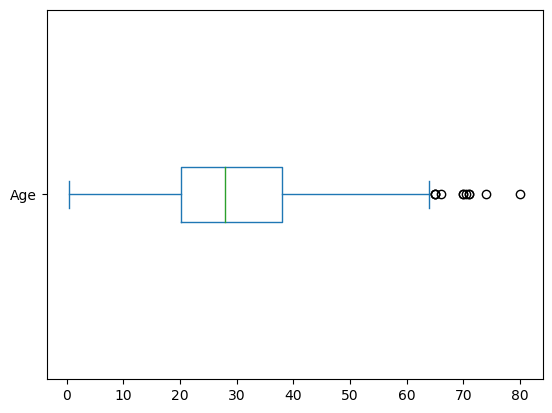

In [27]:
#to find the outliers small circles after 65 and there is no left side outlier
import seaborn as sns
df['Age'].plot(kind='box',vert=False)

In [31]:
def impute_nan(df,variable,median,extreme):
    # A new feature is created and the empty value referenced is replaced with extreme value
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    #The variable feature having nan value is replaced with median
    df[variable].fillna(median,inplace=True) 
    #SO we can compare the missing value in age replaced by median with missing value in new feature replaced by extreme value
    
    

In [32]:
median = df.Age.median()

In [33]:
impute_nan(df,"Age",median,extreme)

In [34]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

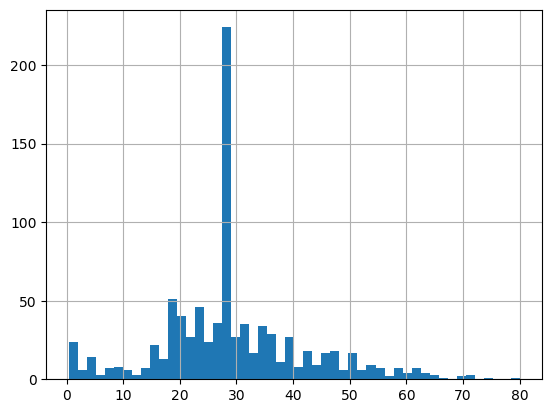

In [35]:
df['Age'].hist(bins=50)

<AxesSubplot:>

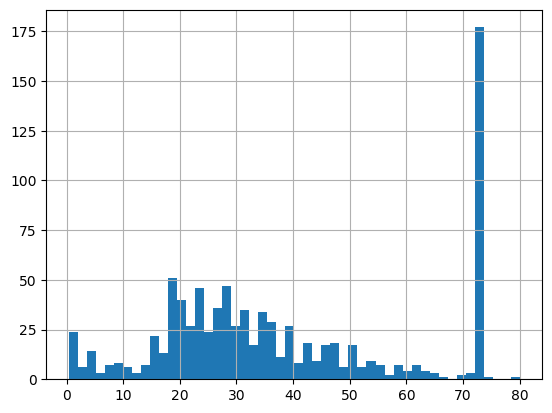

In [36]:
#it is right-skewed
df['Age_end_distribution'].hist(bins=50)

<AxesSubplot:>

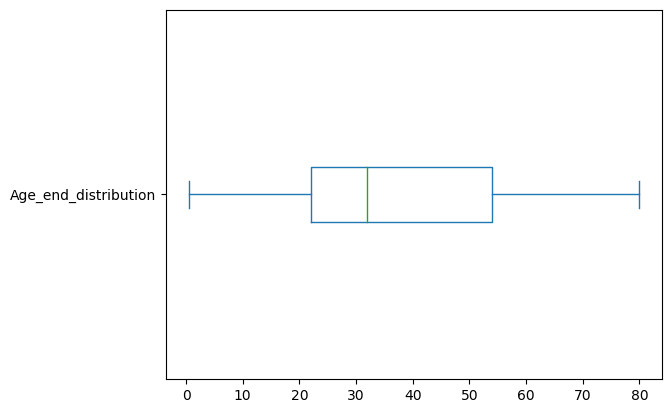

In [38]:
#inside this boxplot there will be no outliers
df['Age_end_distribution'].plot(kind='box',vert=False)